In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sciStat
import nafflib
import time



---
# LHC tracking data
---

The following spectra (100 spectral lines each) are from LHC tracking data (No BB, but x-y coupling and strong 450 A arc octupoles). They accurately represent the (x-px),(y-py),(zeta-pzeta) tracjectories for 10k turns and are intended to be used as realistic example trajectories (validated manually).

In [2]:
# PARTICLES ON MOMENTUM
particles_on_p  = []
for file in ['../tests/data/LHC_particle_on_momentum_1sigma.csv',
             '../tests/data/LHC_particle_on_momentum_3sigma.csv',
             '../tests/data/LHC_particle_on_momentum_5sigma.csv']:
    
    # Loading file
    df  = pd.read_csv(file,index_col=0)
    dct = {}
    for plane in ['x','y','zeta']:  

        _df = df[[f'A{plane}',f'Q{plane}']].rename(columns={f'A{plane}':'amplitude',f'Q{plane}':'frequency'}).astype({'amplitude':np.complex128,'frequency':np.float64})

        # Recreating the signal
        nturns = int(1e4)
        z,pz = nafflib.generate_signal(_df.amplitude,_df.frequency,np.arange(int(nturns)))

        # Saving the signal
        dct[f'{plane}']   = z
        dct[f'p{plane}']  = pz
        dct[f'df{plane}'] = _df
    particles_on_p.append(dct)

    

# PARTICLES OFF MOMENTUM
particles_off_p  = []
for file in ['../tests/data/LHC_particle_off_momentum_1sigma.csv',
             '../tests/data/LHC_particle_off_momentum_3sigma.csv',
             '../tests/data/LHC_particle_off_momentum_5sigma.csv']:
    
    # Loading file
    df  = pd.read_csv(file,index_col=0)
    dct = {}
    for plane in ['x','y','zeta']:  

        _df = df[[f'A{plane}',f'Q{plane}']].rename(columns={f'A{plane}':'amplitude',f'Q{plane}':'frequency'}).astype({'amplitude':np.complex128,'frequency':np.float64})

        # Recreating the signal
        nturns = int(1e4)
        z,pz = nafflib.generate_signal(_df.amplitude,_df.frequency,np.arange(int(nturns)))

        # Saving the signal
        dct[f'{plane}']   = z
        dct[f'p{plane}']  = pz
        dct[f'df{plane}'] = _df
    particles_off_p.append(dct)





---
# Plotting the particles
---

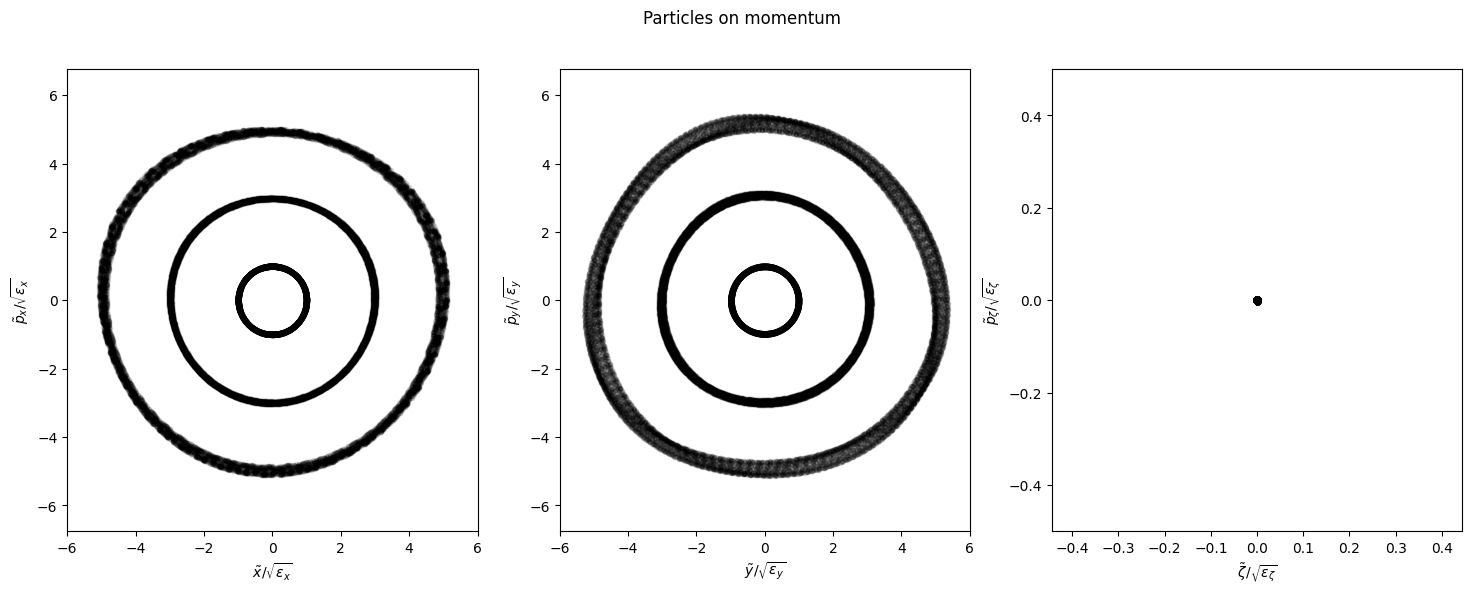

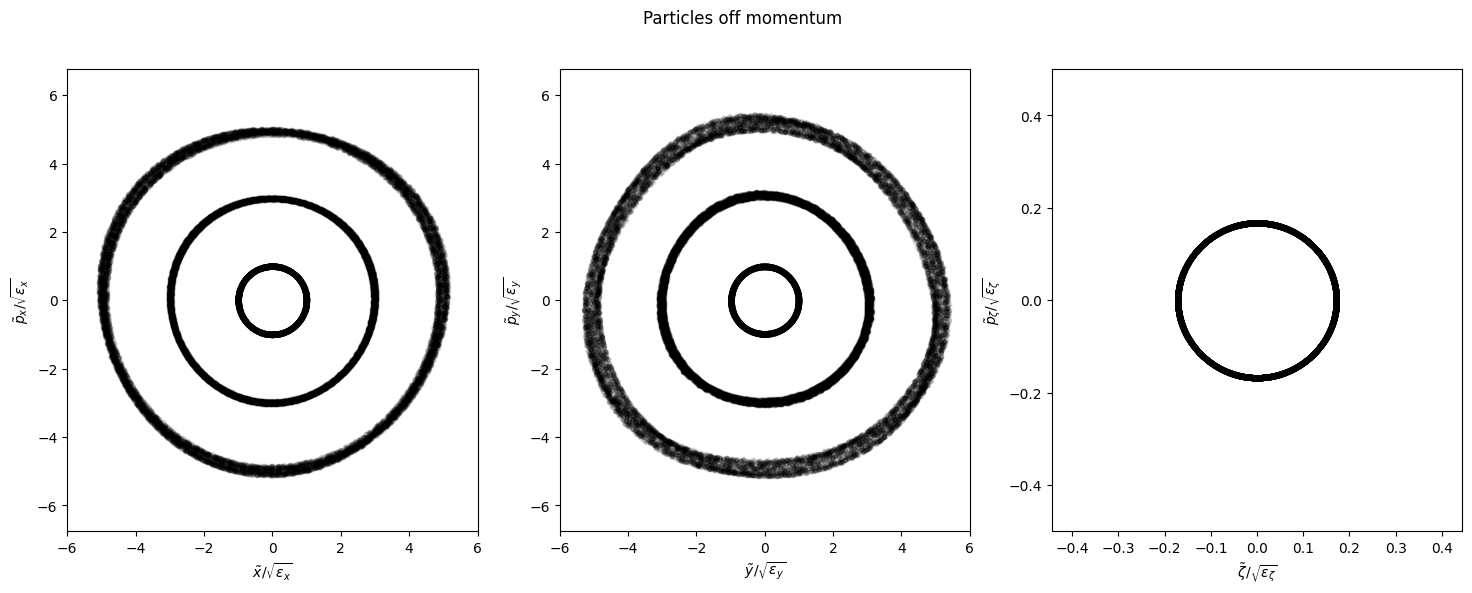

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Particles on momentum')
for part in particles_on_p:
    for plane,ax in zip(['x','y','zeta'],axes):
        plt.sca(ax)
        plt.plot(part[plane],part[f'p{plane}'],'.',color='k',alpha=0.1)

# Adding labels
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    plt.axis('equal')
    if plane == 'zeta':
        plane = '\zeta'
    plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
    plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')
    
    if plane == '\zeta':
        plt.xlim(-0.5,0.5)
        plt.ylim(-0.5,0.5)
    else:
        plt.xlim(-6,6)
        plt.ylim(-6,6)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('Particles off momentum')
for part in particles_off_p:
    for plane,ax in zip(['x','y','zeta'],axes):
        plt.sca(ax)
        plt.plot(part[plane],part[f'p{plane}'],'.',color='k',alpha=0.1)

# Adding labels
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    plt.axis('equal')
    if plane == 'zeta':
        plane = '\zeta'
    plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
    plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')
    
    if plane == '\zeta':
        plt.xlim(-0.5,0.5)
        plt.ylim(-0.5,0.5)
    else:
        plt.xlim(-6,6)
        plt.ylim(-6,6)


---
# Extracting the tune
---

In [4]:
for part,sigma in zip(particles_on_p,[1,3,5]):
    print(40*'-')
    print(f'Particle @ {sigma} sigma:')
    print(f'x only        : {nafflib.tune(part["x"],window_order=2)}')
    print(f'x-px          : {nafflib.tune(part["x"],part["px"],window_order=2)}')

----------------------------------------
Particle @ 1 sigma:
x only        : 0.31002084339097
x-px          : 0.3100208433909691
----------------------------------------
Particle @ 3 sigma:
x only        : 0.31017724865960494
x-px          : 0.31017724865960405
----------------------------------------
Particle @ 5 sigma:
x only        : 0.31048671666610894
x-px          : 0.3104867166661067


---
# Full phase space analysis, x-plane
---

(-6.0, 6.0)

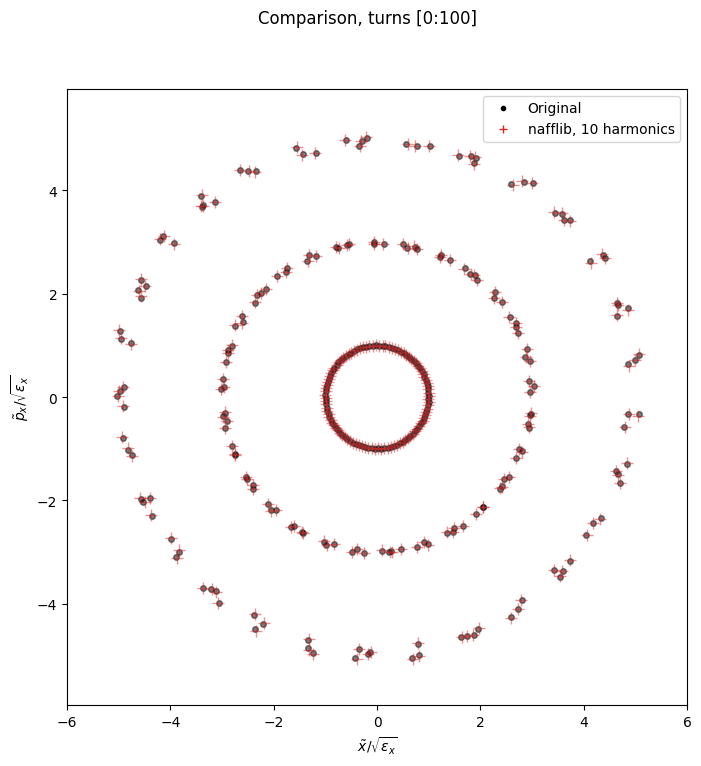

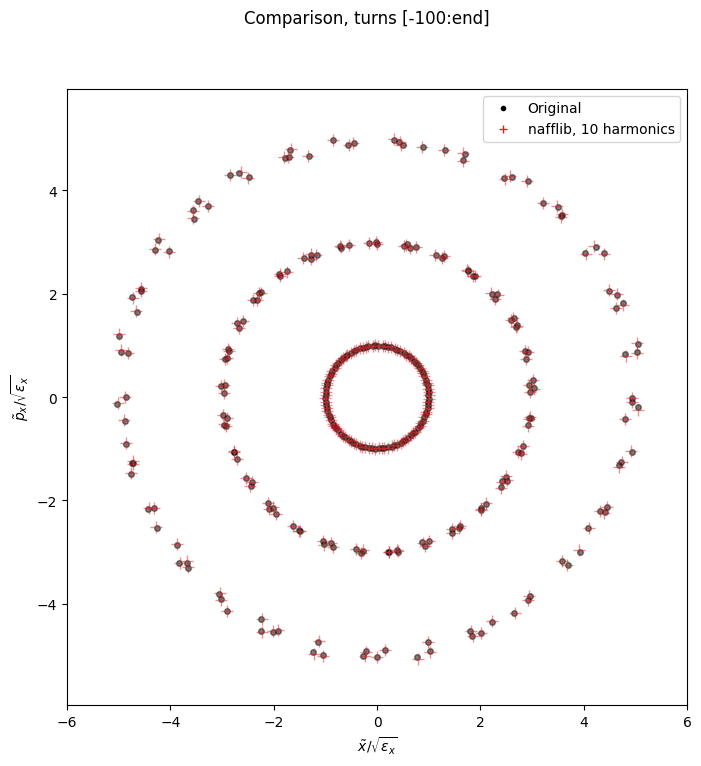

In [5]:
#-----------------------------
# PARAMETERS
n_harm = 10
nturns = 100
#-----------------------------

particles = particles_on_p

plt.figure(figsize=(8,8))
plt.suptitle(f'Comparison, turns [0:{nturns}]')
for part in particles:
    spectrum = nafflib.harmonics(part['x'],part['px'],num_harmonics = n_harm,window_order=2,to_pandas=True)
    x_r,px_r = nafflib.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(part['x'])))

    plt.plot(part['x'][:nturns],part['px'][:nturns] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(x_r[:nturns],px_r[:nturns]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'nafflib, {n_harm} harmonics')
plt.legend()
plt.axis('equal')
plt.xlabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')
plt.ylabel(rf'$\tilde p_x/\sqrt{{\varepsilon_x}}$')
plt.xlim(-6,6)
plt.ylim(-6,6)


plt.figure(figsize=(8,8))
plt.suptitle(f'Comparison, turns [-{nturns}:end]')
for part in particles:
    spectrum = nafflib.harmonics(part['x'],part['px'],num_harmonics = n_harm,window_order=2,to_pandas=True)
    x_r,px_r = nafflib.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(part['x'])))

    plt.plot(part['x'][-nturns:],part['px'][-nturns:] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(x_r[-nturns:],px_r[-nturns:]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'nafflib, {n_harm} harmonics')
plt.legend()
plt.axis('equal')
plt.xlabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')
plt.ylabel(rf'$\tilde p_x/\sqrt{{\varepsilon_x}}$')
plt.xlim(-6,6)
plt.ylim(-6,6)



---
# Position ONLY analysis
---


Text(0, 0.5, '$\\tilde x/\\sqrt{\\varepsilon_x}$')

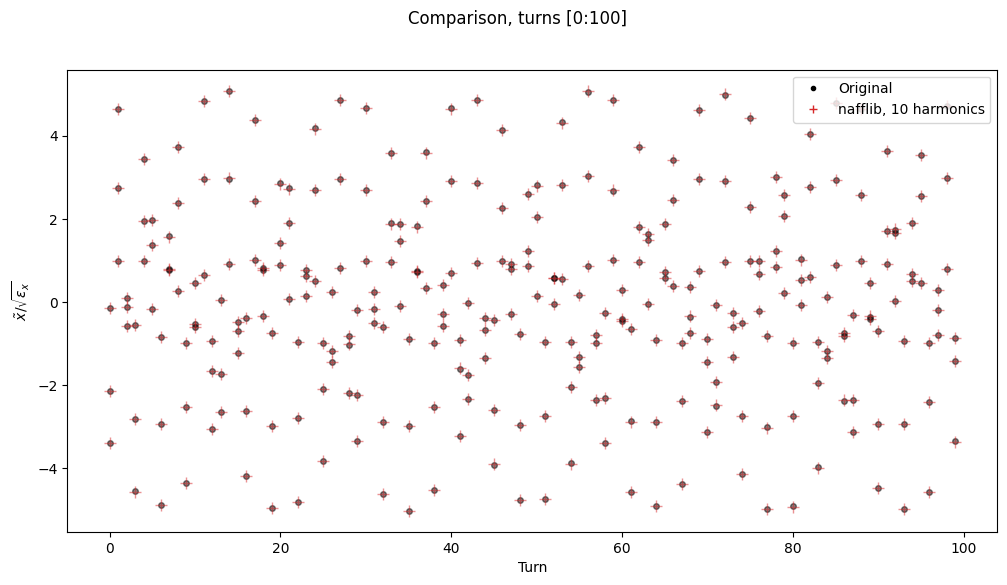

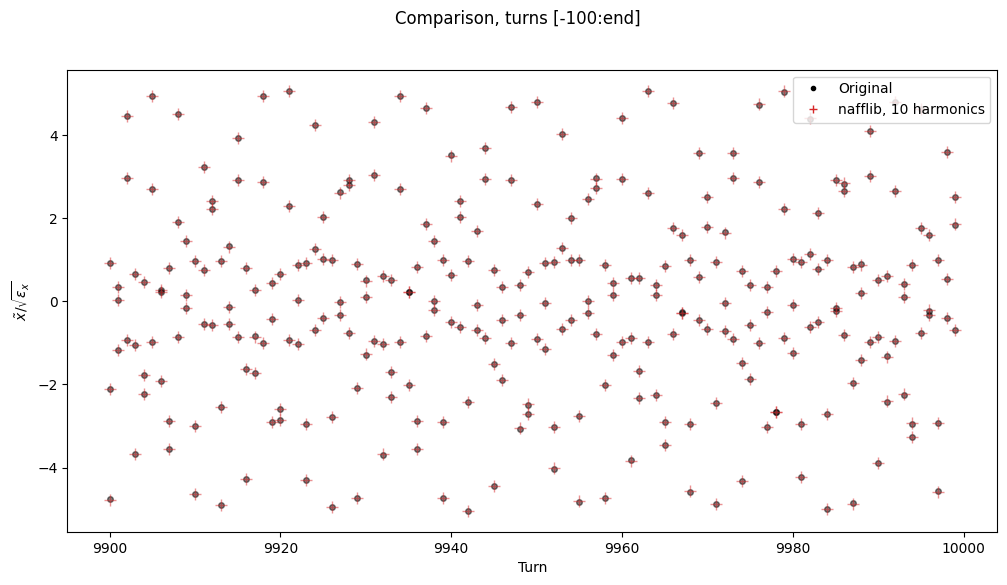

In [6]:
particles = particles_on_p
n_harm = 10
plt.figure(figsize=(12,6))
plt.suptitle(f'Comparison, turns [0:{nturns}]')
for part in particles:
    spectrum = nafflib.harmonics(part['x'],num_harmonics = n_harm,window_order=2,to_pandas=True)
    x_r, _   = nafflib.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(part['x'])))

    plt.plot(np.arange(0,nturns),part['x'][:nturns] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(np.arange(0,nturns),x_r[:nturns]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'nafflib, {n_harm} harmonics')
plt.legend()
plt.xlabel(rf'Turn')
plt.ylabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')


plt.figure(figsize=(12,6))
plt.suptitle(f'Comparison, turns [-{nturns}:end]')
for part in particles:
    spectrum = nafflib.harmonics(part['x'],num_harmonics = n_harm,window_order=2,to_pandas=True)
    x_r, _   = nafflib.generate_signal(spectrum.amplitude,spectrum.frequency,np.arange(len(part['x'])))

    plt.plot(np.arange(int(1e4-nturns),int(1e4)),part['x'][-nturns:] ,'.',ms=8,color='k'  ,alpha=0.5)
    plt.plot(np.arange(int(1e4-nturns),int(1e4)),x_r[-nturns:]             ,'+',ms=8,color='C3' ,alpha=0.5)

plt.plot(np.nan,np.nan,'.',color='k' ,label='Original')
plt.plot(np.nan,np.nan,'+',color='C3',label=f'nafflib, {n_harm} harmonics')
plt.legend()
plt.xlabel(rf'Turn')
plt.ylabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')


---
# Spectrum comparison
---

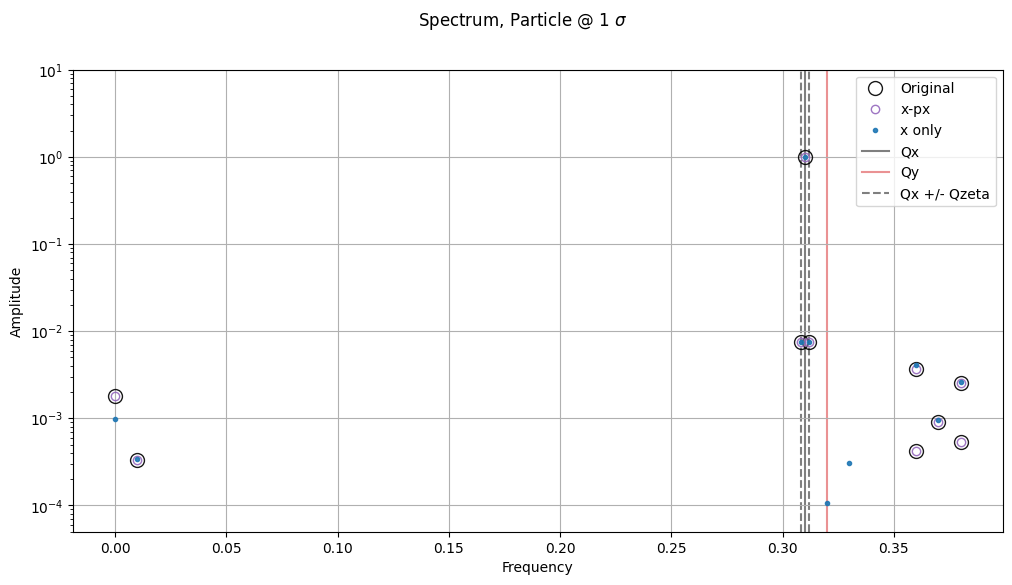

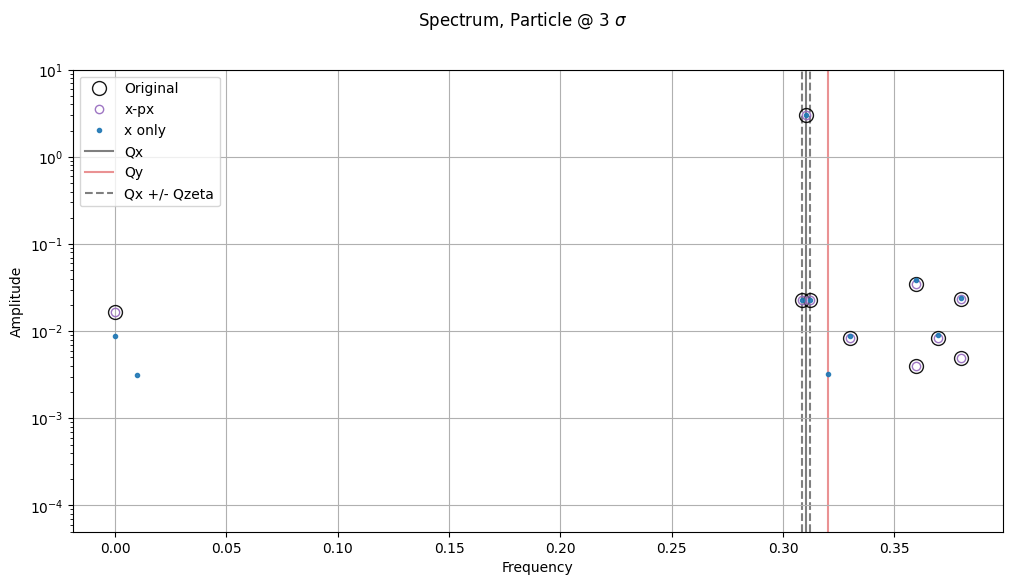

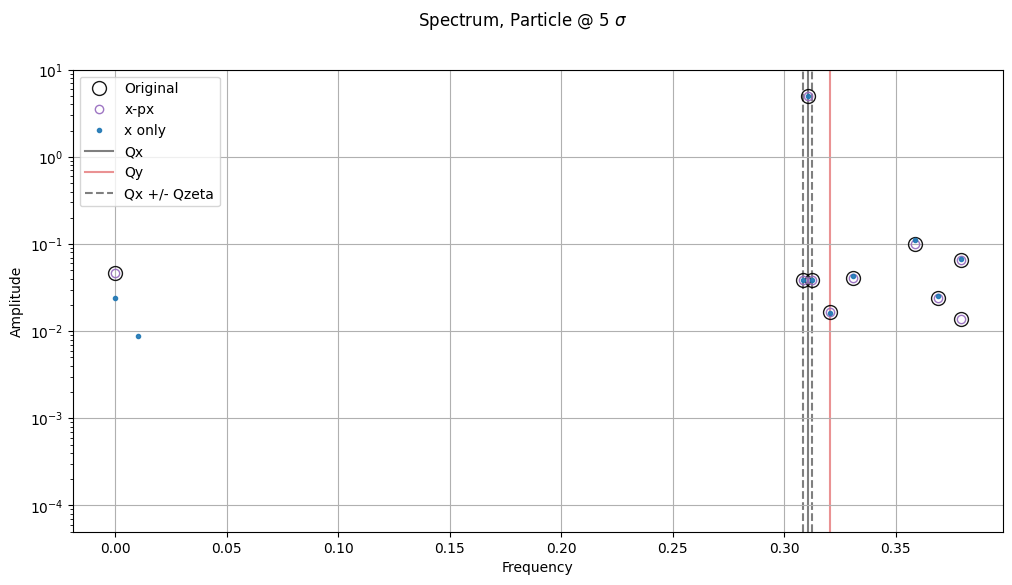

In [7]:
particles = particles_on_p
for part,sigma in zip(particles,[1,3,5]):
    plt.figure(figsize=(12,6))
    plt.suptitle(f'Spectrum, Particle @ {sigma} $\sigma$')
    spectrum_x    = nafflib.harmonics(part['x'],             num_harmonics = n_harm,window_order=2,to_pandas=True)
    spectrum_x_px = nafflib.harmonics(part['x'],part['px'],  num_harmonics = n_harm,window_order=2,to_pandas=True)

    fundamental_tunes = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=2) for plane in ['x','y','zeta']]

    plt.plot( np.abs(part['dfx'].frequency[:n_harm]),np.abs(part['dfx'].amplitude[:n_harm]),'o',ms=10,mfc='none',   color='black' ,alpha=0.9,label='Original')
    plt.plot( np.abs(spectrum_x_px.frequency),np.abs(spectrum_x_px.amplitude),'o',mfc='none',   color='C4' ,alpha=0.9,label='x-px')
    plt.plot( np.abs(spectrum_x.frequency)   ,np.abs(spectrum_x.amplitude),'.'   ,                    color='C0' ,alpha=0.9,label='x only')

    plt.axvline(fundamental_tunes[0],color='k',label='Qx',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[1],color='C3',label='Qy',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[0]+fundamental_tunes[2],ls='--',color='k',label='Qx +/- Qzeta',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[0]-fundamental_tunes[2],ls='--',color='k',zorder = -100,alpha=0.5)

    plt.legend()
    plt.yscale('log')
    plt.ylim(5e-5,1e1)
    plt.grid()
    plt.xlabel(rf'Frequency')
    plt.ylabel(rf'Amplitude')
    

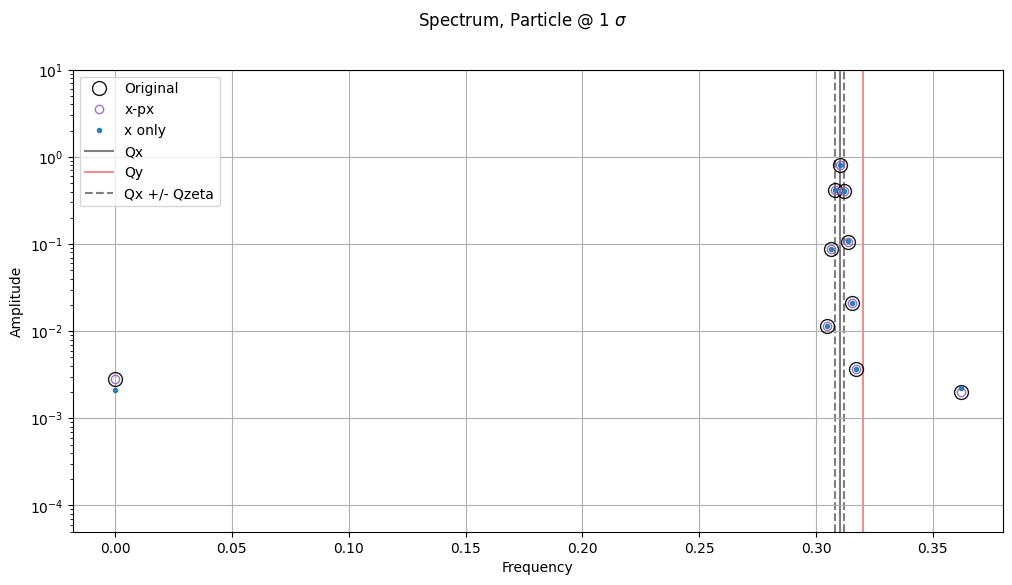

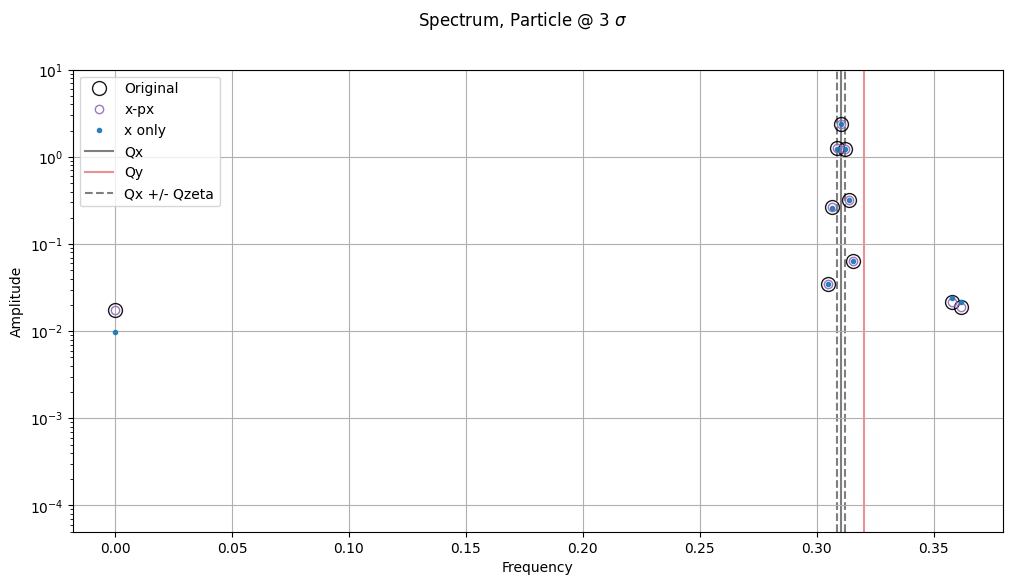

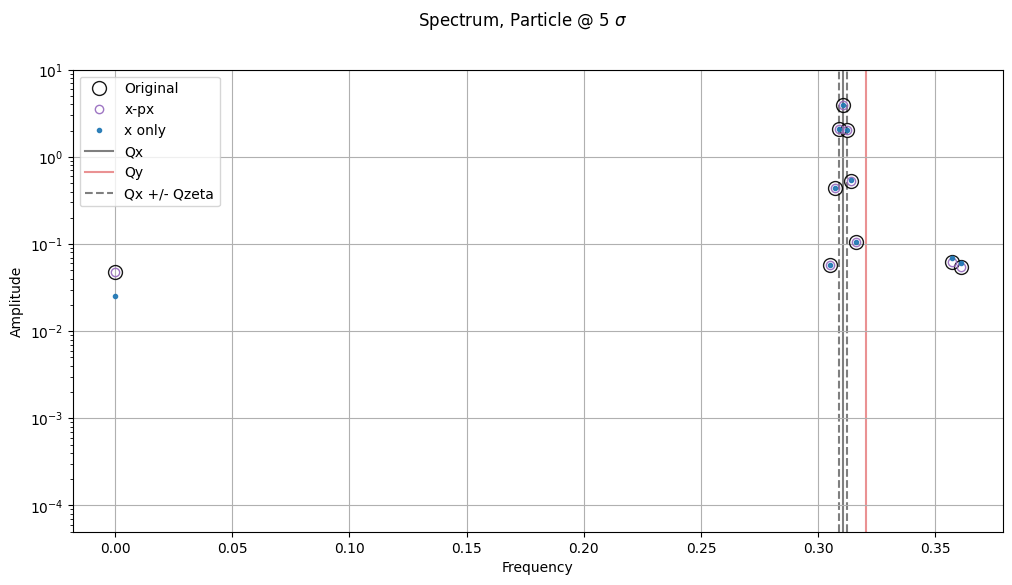

In [8]:
particles = particles_off_p
for part,sigma in zip(particles,[1,3,5]):
    plt.figure(figsize=(12,6))
    plt.suptitle(f'Spectrum, Particle @ {sigma} $\sigma$')
    spectrum_x    = nafflib.harmonics(part['x'],             num_harmonics = n_harm,window_order=2,to_pandas=True)
    spectrum_x_px = nafflib.harmonics(part['x'],part['px'],  num_harmonics = n_harm,window_order=2,to_pandas=True)

    fundamental_tunes = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=2) for plane in ['x','y','zeta']]

    plt.plot( np.abs(part['dfx'].frequency[:n_harm]),np.abs(part['dfx'].amplitude[:n_harm]),'o',ms=10,mfc='none',   color='black' ,alpha=0.9,label='Original')
    plt.plot( np.abs(spectrum_x_px.frequency),np.abs(spectrum_x_px.amplitude),'o',mfc='none',   color='C4' ,alpha=0.9,label='x-px')
    plt.plot( np.abs(spectrum_x.frequency)   ,np.abs(spectrum_x.amplitude),'.'   ,                    color='C0' ,alpha=0.9,label='x only')

    plt.axvline(fundamental_tunes[0],color='k',label='Qx',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[1],color='C3',label='Qy',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[0]+fundamental_tunes[2],ls='--',color='k',label='Qx +/- Qzeta',zorder = -100,alpha=0.5)
    plt.axvline(fundamental_tunes[0]-fundamental_tunes[2],ls='--',color='k',zorder = -100,alpha=0.5)

    plt.legend()
    plt.yscale('log')
    plt.ylim(5e-5,1e1)
    plt.grid()
    plt.xlabel(rf'Frequency')
    plt.ylabel(rf'Amplitude')
    

---
# Frequencies as linear combinations?
---

In [9]:
particles = particles_on_p
plane = 'x'
for part in particles:
    Q_vec = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=2) for plane in ['x','y','zeta']]
    spectrum = nafflib.harmonics(part[f'{plane}'],part[f'p{plane}'], num_harmonics = n_harm,window_order=2,to_pandas=True)
    resonances = nafflib.find_linear_combinations(spectrum.frequency,fundamental_tunes= Q_vec,to_pandas=True)
    display(resonances)

,resonance,err,frequency
0,"(1, 0, 0, 0)",0.000000e+00,0.310021
1,"(1, 0, -1, 0)",4.807044e-12,0.311887
2,"(1, 0, 1, 0)",1.496858e-12,0.308154
3,"(0, -2, 0, 1)",6.789014e-14,0.359959
4,"(-2, 0, 0, 1)",1.150191e-13,0.379958
5,"(0, 0, 0, 0)",3.293430e-14,0.000000
6,"(-1, -1, 0, 1)",4.435341e-14,0.369959
7,"(2, 0, 0, -1)",9.270362e-15,-0.379958
8,"(0, 2, 0, -1)",1.169620e-13,-0.359959
9,"(1, -1, 0, 0)",1.577037e-14,-0.010000


,resonance,err,frequency
0,"(1, 0, 0, 0)",0.000000e+00,0.310177
1,"(0, -2, 0, 1)",7.244205e-14,0.359595
2,"(-2, 0, 0, 1)",1.177947e-13,0.379646
3,"(1, 0, -1, 0)",4.450218e-12,0.312044
4,"(1, 0, 1, 0)",1.939726e-12,0.308311
5,"(0, 0, 0, 0)",1.641366e-14,0.000000
6,"(-1, -1, 0, 1)",1.254552e-14,0.369620
7,"(-1, 2, 0, 0)",1.077527e-12,0.330227
8,"(2, 0, 0, -1)",1.942890e-15,-0.379646
9,"(0, 2, 0, -1)",5.978551e-14,-0.359595


,resonance,err,frequency
0,"(1, 0, 0, 0)",0.000000e+00,0.310487
1,"(0, -2, 0, 1)",1.815159e-12,0.358844
2,"(-2, 0, 0, 1)",1.720574e-11,0.379027
3,"(0, 0, 0, 0)",2.078131e-11,0.000000
4,"(-1, 2, 0, 0)",8.731521e-11,0.330669
5,"(1, 0, -1, 0)",6.939514e-09,0.312353
6,"(1, 0, 1, 0)",3.496587e-09,0.308620
7,"(-1, -1, 0, 1)",1.516959e-11,0.368936
8,"(0, 1, 0, 0)",2.944767e-11,0.320578
9,"(2, 0, 0, -1)",9.353629e-12,-0.379027


In [10]:
particles = particles_off_p
plane = 'x'
for part in particles:
    Q_vec = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=2) for plane in ['x','y','zeta']]
    spectrum = nafflib.harmonics(part[f'{plane}'],part[f'p{plane}'], num_harmonics = n_harm,window_order=2,to_pandas=True)
    resonances = nafflib.find_linear_combinations(spectrum.frequency,fundamental_tunes= Q_vec,to_pandas=True)
    display(resonances)

,resonance,err,frequency
0,"(1, 0, 0, 0)",0.000000e+00,0.310105
1,"(1, 0, -1, 0)",5.233314e-12,0.311905
2,"(1, 0, 1, 0)",1.393419e-11,0.308305
3,"(1, 0, -2, 0)",2.159678e-11,0.313705
4,"(1, 0, 2, 0)",1.466843e-11,0.306505
5,"(1, 0, -3, 0)",1.337342e-10,0.315505
6,"(1, 0, 3, 0)",1.864964e-11,0.304705
7,"(1, 0, -4, 0)",2.304479e-09,0.317305
8,"(0, 0, 0, 0)",6.507586e-12,0.000000
9,"(0, -2, -1, 1)",2.959257e-10,0.361818


,resonance,err,frequency
0,"(1, 0, 0, 0)",0.000000e+00,0.310262
1,"(1, 0, 1, 0)",3.018269e-11,0.308462
2,"(1, 0, -1, 0)",1.224576e-11,0.312062
3,"(1, 0, -2, 0)",3.248168e-11,0.313862
4,"(1, 0, 2, 0)",1.456368e-11,0.306661
5,"(1, 0, -3, 0)",3.073648e-10,0.315662
6,"(1, 0, 3, 0)",1.278683e-11,0.304861
7,"(0, -2, 1, 1)",1.617528e-11,0.357853
8,"(0, -2, -1, 1)",7.009088e-11,0.361454
9,"(0, 0, 0, 0)",2.653247e-12,0.000000


,resonance,err,frequency
0,"(1, 0, 0, 0)",0.000000e+00,0.310571
1,"(1, 0, -1, 0)",3.976580e-11,0.312371
2,"(1, 0, 1, 0)",1.181999e-12,0.308771
3,"(1, 0, -2, 0)",3.415140e-11,0.314171
4,"(1, 0, 2, 0)",1.893367e-10,0.306971
5,"(1, 0, -3, 0)",1.012895e-09,0.315971
6,"(0, -2, 1, 1)",1.458055e-10,0.357099
7,"(1, 0, 3, 0)",1.049588e-10,0.305171
8,"(0, -2, -1, 1)",6.140933e-10,0.360699
9,"(0, 0, 0, 0)",1.009002e-10,0.000000


---
# Convergence
---

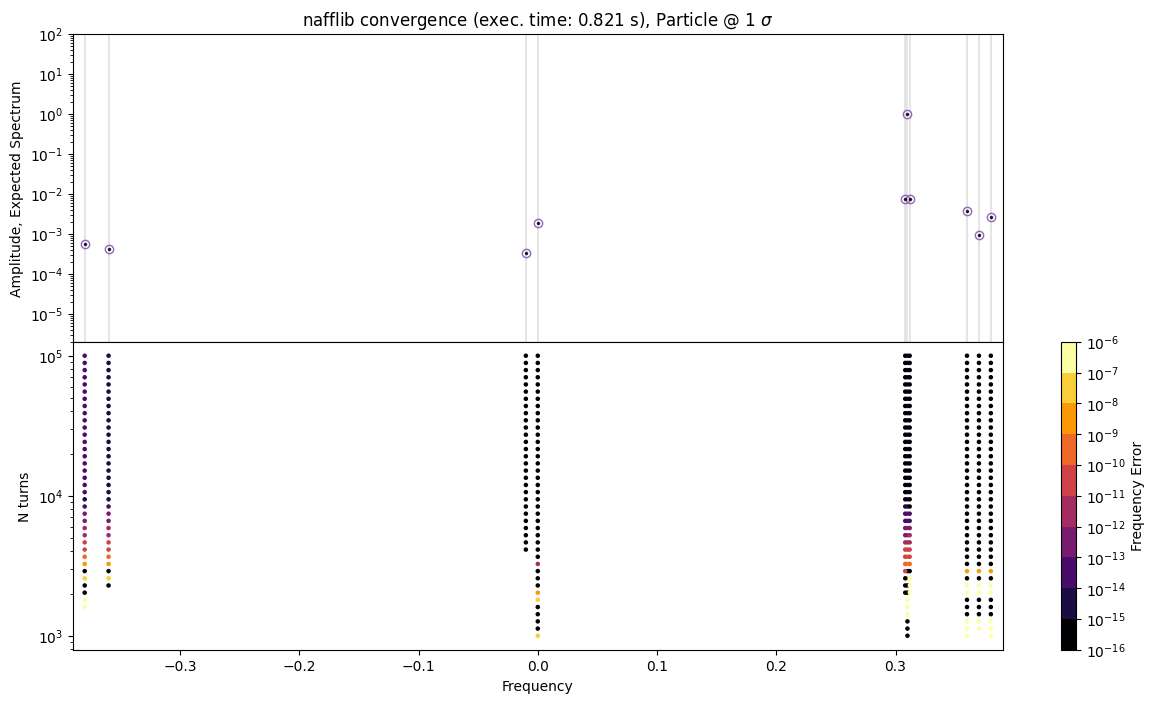

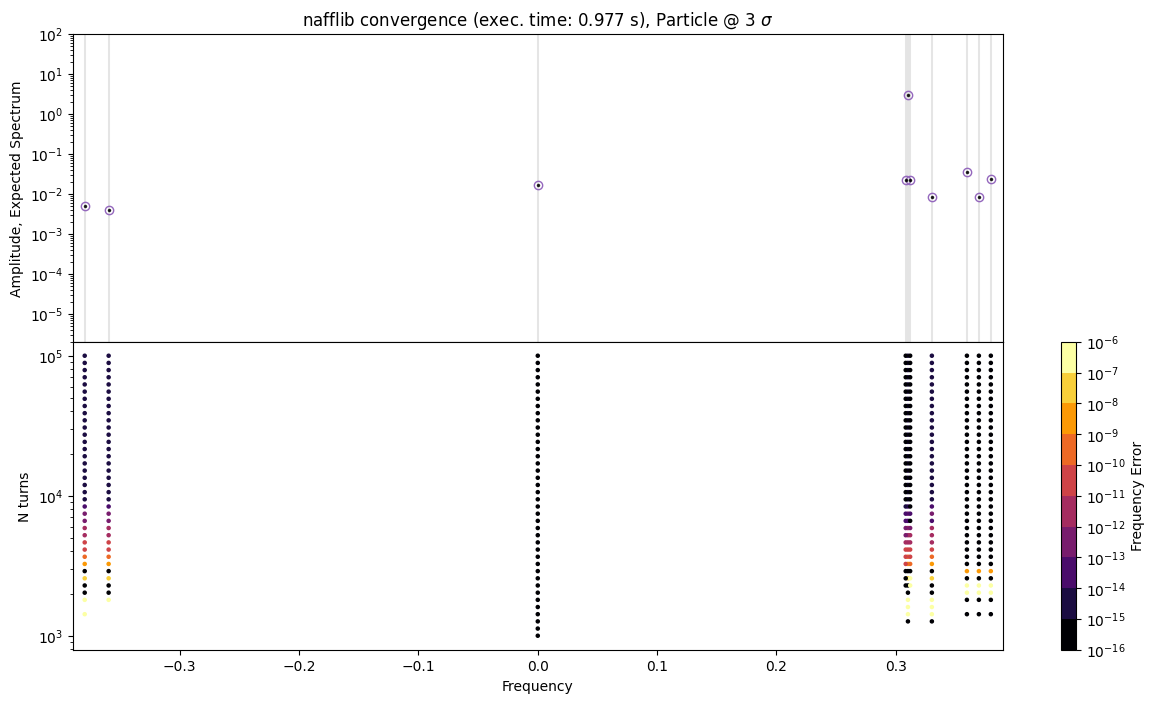

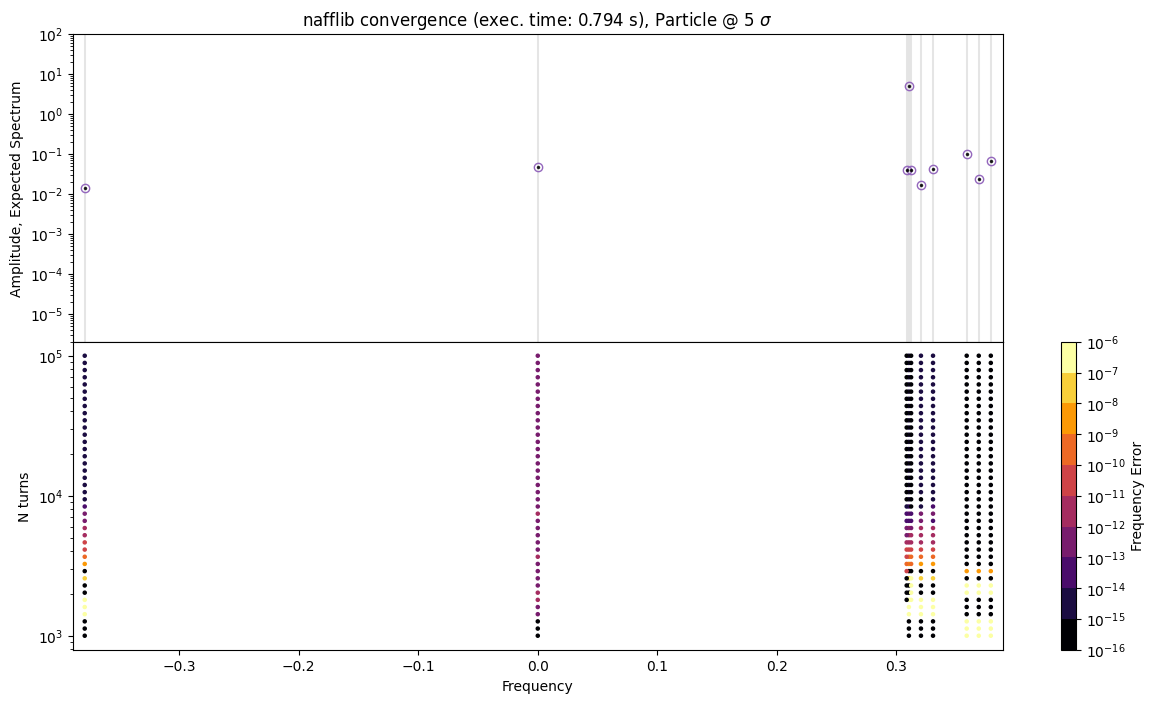

In [11]:

import matplotlib.colors as colors



plane     = 'x'
particles = particles_on_p

n_harm = 10
cmap_name = 'inferno'
for part,sigma in zip(particles,[1,3,5]):

    
    Q_vec = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=4) for plane in ['x','y','zeta']]
    A     = part[f'df{plane}'].amplitude[:n_harm]
    Q     = part[f'df{plane}'].frequency[:n_harm]

    # Looping for different number of turns
    N_vec = np.logspace(3,5,40).astype(int)
    N_list   = []
    Q_list   = []
    A_list   = []
    errors_Q = []
    errors_A = []
    t1 = time.perf_counter()
    for N in N_vec:

        # Extracting signal
        x,px = part[f'{plane}'][:N],part[f'p{plane}'][:N]
        
        # nafflib
        A_found,Q_found = nafflib.harmonics(x,px,num_harmonics = len(Q),window_order = 4,window_type = 'hann')


        # Sorting lines and compiling errors
        #-----------------------------------
        r,_,_ = nafflib.find_linear_combinations(Q,fundamental_tunes= Q_vec)
        r_found,_,_ = nafflib.find_linear_combinations(Q_found,fundamental_tunes= Q_vec)

        for res,_A,_Q in zip(r,A,Q):
            if res in r_found:
                found_idx = r_found.index(res)
                errors_Q.append(Q_found[found_idx]-_Q)
                errors_A.append(np.abs(A_found[found_idx])-np.abs(_A))
            else:
                errors_Q.append(np.nan)
                errors_A.append(np.nan)
            Q_list.append(_Q)
            A_list.append(np.abs(_A))
            N_list.append(N)
        #-----------------------------------
    t2 = time.perf_counter()

    # PLOTTING
    #=========================================
    fig, axs = plt.subplots(2, 1,figsize=(15,8))
    axs[0].set_title(f'nafflib convergence (exec. time: {t2-t1:.3f} s), Particle @ {sigma} $\sigma$')
    plt.subplots_adjust(hspace=0)


    # Bottom plot
    #---------------
    plt.sca(axs[1])
    bounds = np.array([1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6])
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    plt.scatter(Q_list,N_list,c=errors_Q,s=5,norm=norm,cmap=cmap_name)

    cbar = plt.colorbar(label='Frequency Error',ticks=bounds)
    cbar.ax.set_yticklabels([f'$10^{{{int(np.log10(b))}}}$' for b in bounds]) 


    plt.yscale('log')
    # plt.xlim(np.min(Q)-2*dQ,np.max(Q)+2*dQ)
    plt.xlabel('Frequency')
    plt.ylabel('N turns')
    plt.xlim(np.min(Q_list)-0.01,np.max(Q_list)+0.01)
    #---------------


    # Top plot
    #---------------
    plt.sca(axs[0])
    plt.plot(Q,np.abs(A),'o',color='C4',alpha=1,mfc='none',label='EXPECTED')
    plt.plot(Q_found,np.abs(A_found),'.',color='k',alpha=0.8,ms=3,label='nafflib')
    plt.scatter(np.nan,np.nan)
    cbar = plt.colorbar()
    cbar.ax.set_visible(False)
    plt.xticks([])

    plt.yscale('log')
    
    plt.ylabel('Amplitude, Expected Spectrum')
    for line in Q:
        plt.axvline(line,color='k',alpha=0.1,zorder=-10)
    plt.xlim(np.min(Q_list)-0.01,np.max(Q_list)+0.01)
    plt.ylim(2e-6,1e2)
    #---------------

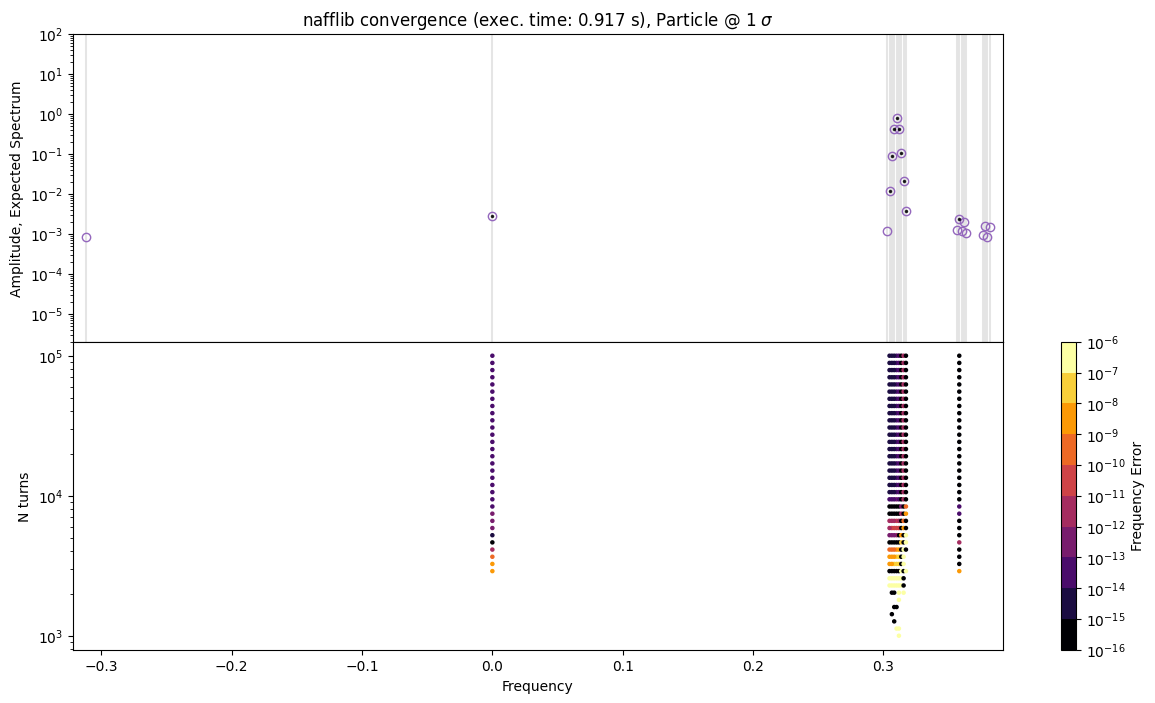

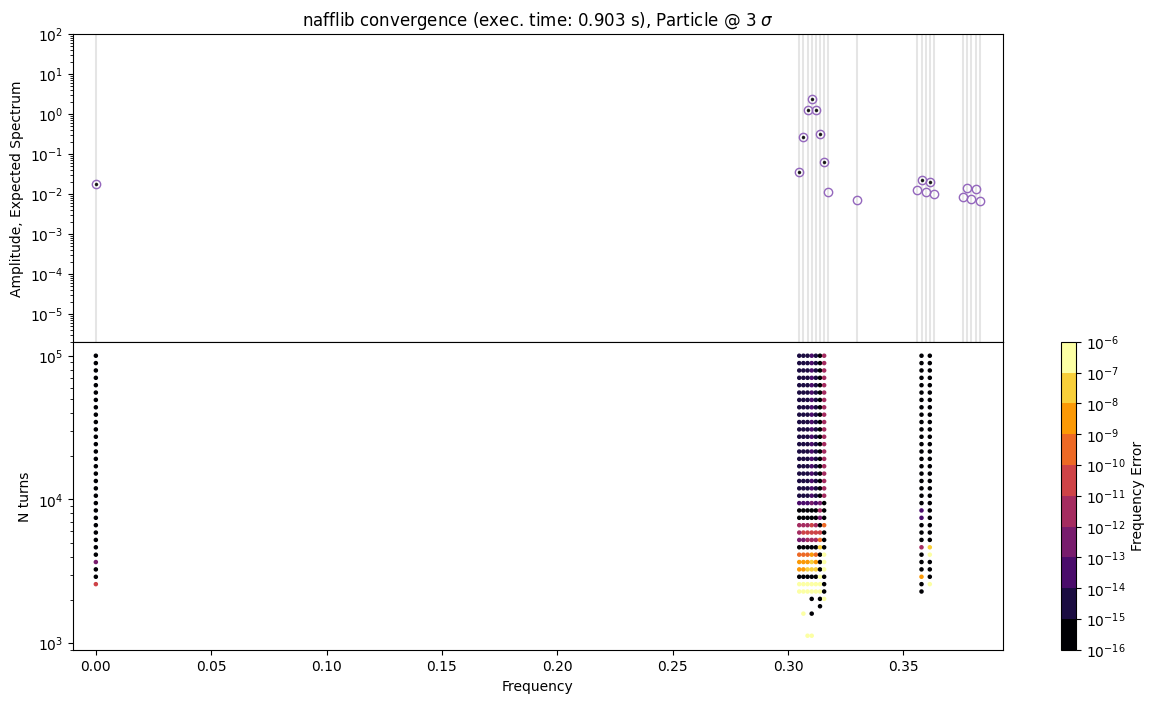

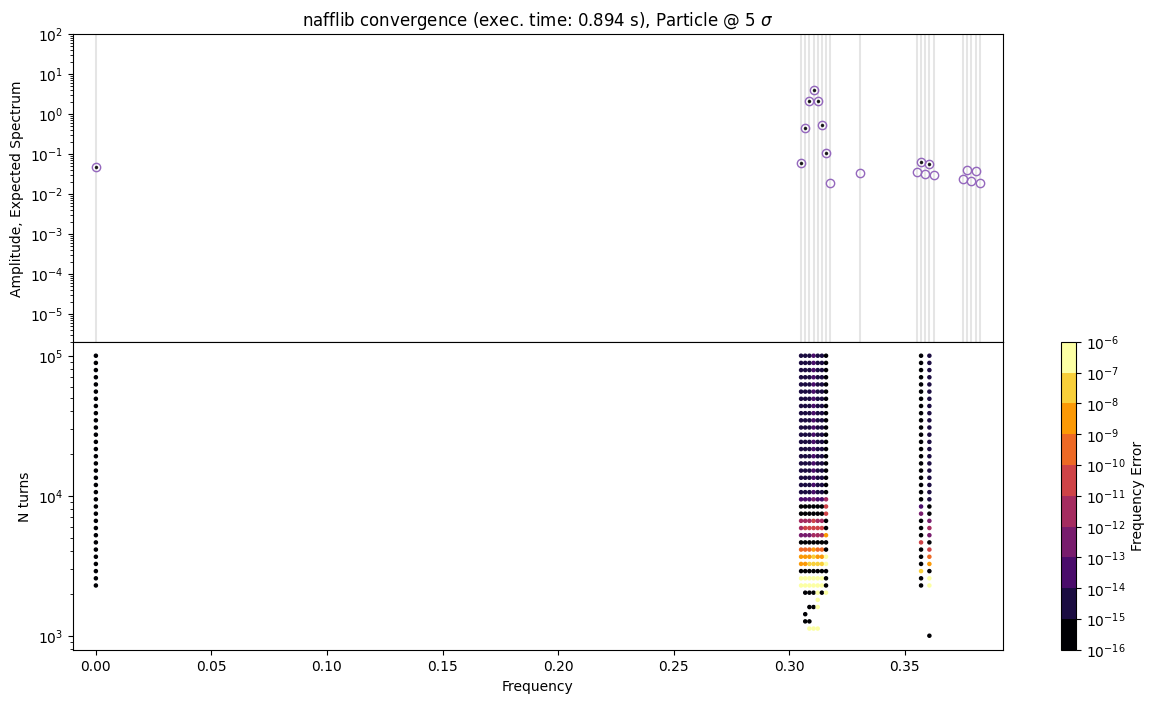

In [14]:

import matplotlib.colors as colors



plane     = 'x'
particles = particles_off_p

n_harm = 10
cmap_name = 'inferno'
for part,sigma in zip(particles,[1,3,5]):

    
    Q_vec = [nafflib.tune(part[f'{plane}'],part[f'p{plane}'],window_order=4) for plane in ['x','y','zeta']]
    A     = part[f'df{plane}'].amplitude[:n_harm]
    Q     = part[f'df{plane}'].frequency[:n_harm]

    # Looping for different number of turns
    N_vec = np.logspace(3,5,40).astype(int)
    N_list   = []
    Q_list   = []
    A_list   = []
    errors_Q = []
    errors_A = []
    t1 = time.perf_counter()
    for N in N_vec:

        # Extracting signal
        x,px = part[f'{plane}'][:N],part[f'p{plane}'][:N]
        
        # nafflib
        A_found,Q_found = nafflib.harmonics(x,px,num_harmonics = len(Q),window_order = 4,window_type = 'hann')


        # Sorting lines and compiling errors
        #-----------------------------------
        r,_,_ = nafflib.find_linear_combinations(Q,fundamental_tunes= Q_vec)
        r_found,_,_ = nafflib.find_linear_combinations(Q_found,fundamental_tunes= Q_vec)

        for res,_A,_Q in zip(r,A,Q):
            if res in r_found:
                found_idx = r_found.index(res)
                errors_Q.append(Q_found[found_idx]-_Q)
                errors_A.append(np.abs(A_found[found_idx])-np.abs(_A))
            else:
                errors_Q.append(np.nan)
                errors_A.append(np.nan)
            Q_list.append(_Q)
            A_list.append(np.abs(_A))
            N_list.append(N)
        #-----------------------------------
    t2 = time.perf_counter()

    # PLOTTING
    #=========================================
    fig, axs = plt.subplots(2, 1,figsize=(15,8))
    axs[0].set_title(f'nafflib convergence (exec. time: {t2-t1:.3f} s), Particle @ {sigma} $\sigma$')
    plt.subplots_adjust(hspace=0)


    # Bottom plot
    #---------------
    plt.sca(axs[1])
    bounds = np.array([1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6])
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    plt.scatter(Q_list,N_list,c=errors_Q,s=5,norm=norm,cmap=cmap_name)

    cbar = plt.colorbar(label='Frequency Error',ticks=bounds)
    cbar.ax.set_yticklabels([f'$10^{{{int(np.log10(b))}}}$' for b in bounds]) 


    plt.yscale('log')
    # plt.xlim(np.min(Q)-2*dQ,np.max(Q)+2*dQ)
    plt.xlabel('Frequency')
    plt.ylabel('N turns')
    plt.xlim(np.min(Q_list)-0.01,np.max(Q_list)+0.01)
    #---------------


    # Top plot
    #---------------
    plt.sca(axs[0])
    plt.plot(Q,np.abs(A),'o',color='C4',alpha=1,mfc='none',label='EXPECTED')
    plt.plot(Q_found,np.abs(A_found),'.',color='k',alpha=0.8,ms=3,label='nafflib')
    plt.scatter(np.nan,np.nan)
    cbar = plt.colorbar()
    cbar.ax.set_visible(False)
    plt.xticks([])

    plt.yscale('log')
    
    plt.ylabel('Amplitude, Expected Spectrum')
    for line in Q:
        plt.axvline(line,color='k',alpha=0.1,zorder=-10)
    plt.xlim(np.min(Q_list)-0.01,np.max(Q_list)+0.01)
    plt.ylim(2e-6,1e2)
    #---------------